<h1 style="color: orange;">[0]</h1>

In [5]:
import os
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import random
from PIL import Image

<h1 style="color: orange;">[1]</h1>

- Variables, directory and classes count

In [2]:
base_dir = "../1-Data-Collection/nasa_images"
classes = ["galaxy", "nebula", "planet", "star", "comet", "asteroid", "black hole"]
counts = []

for label in classes: # Iterate over each class
    folder_path = os.path.join(base_dir, label)
    n_images = len(os.listdir(folder_path)) if os.path.exists(folder_path) else 0
    counts.append(n_images)
    print("Number of files in", label, ":", n_images)

Number of files in galaxy : 3096
Number of files in nebula : 594
Number of files in planet : 10028
Number of files in star : 7694
Number of files in comet : 1059
Number of files in asteroid : 3646
Number of files in black hole : 1015


<h1 style="color: orange;">[2]</h1>

- Checking class imbalance

In [3]:
fig = go.Figure(
    data=[go.Bar(x=classes, y=counts, marker_color='rgb(58,71,80)', marker_line_color='white', marker_line_width=1.5)]
)
fig.update_layout(
    title="Class Imbalance in NASA Images Dataset",
    xaxis=dict(title="Classes"),
    yaxis=dict(title="Number of Files"),
    template="plotly_dark"
)
fig.show()

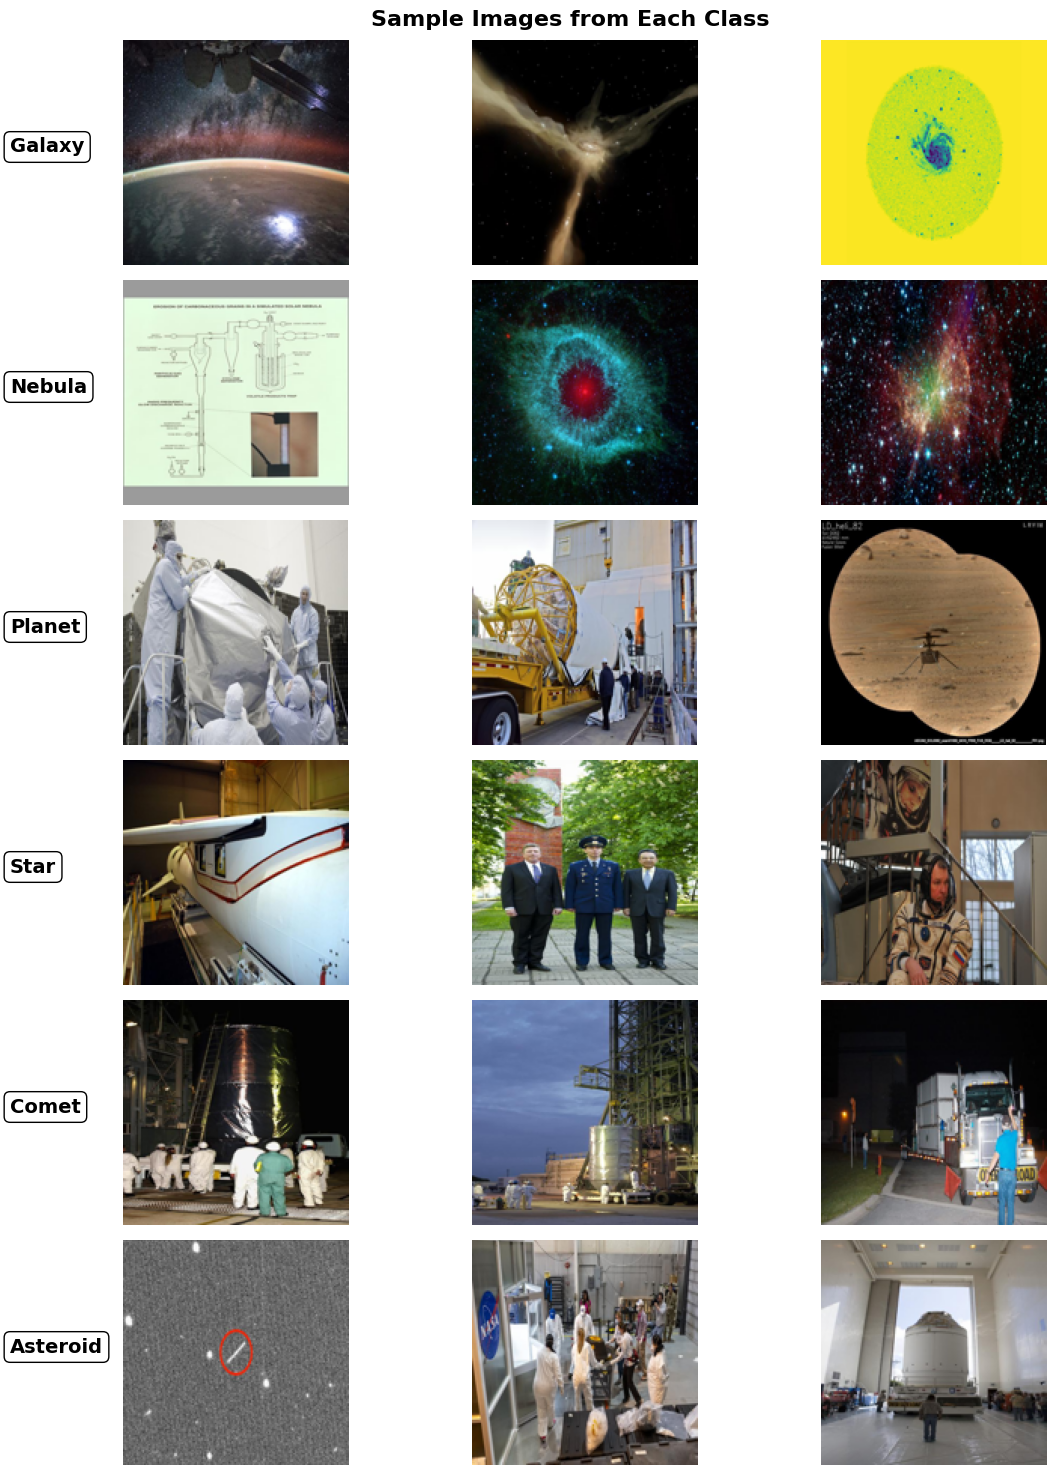

In [26]:
# Set paths and configurations
base_dir = "../1-Data-Collection/nasa_images"
num_images_per_class = 3  # Number of images to display per class
classes = ["galaxy", "nebula", "planet", "star", "comet", "asteroid"]
fixed_size = (150, 150)  # Fixed image size for uniformity

# Calculate figure size dynamically
fig, axes = plt.subplots(len(classes), num_images_per_class, figsize=(12, 2.5 * len(classes)))
axes = axes.reshape(len(classes), num_images_per_class)  # Reshape for easier iteration

# Plot images class by class
for i, cls in enumerate(classes):
    folder_path = os.path.join(base_dir, cls)
    class_images = []

    # Select random images for the class
    if os.path.exists(folder_path) and os.listdir(folder_path):  # Check folder exists and isn't empty
        class_images = random.sample(
            os.listdir(folder_path), min(len(os.listdir(folder_path)), num_images_per_class)
        )

    # Plot images for the class
    for j in range(num_images_per_class):
        ax = axes[i, j]
        if j < len(class_images):
            img_path = os.path.join(folder_path, class_images[j])
            img = Image.open(img_path).resize(fixed_size)  # Resize to fixed dimensions
            ax.imshow(img)
            ax.axis("off")  # Hide axis ticks
        else:
            ax.axis("off")  # Turn off unused subplots

    # Add the class title above the row of images
    axes[i, 0].text(
        -0.5,  # Slightly to the left of the first image
        0.5,  # Centered vertically in the row
        cls.capitalize(),
        fontsize=14,
        fontweight="bold",
        color="black",
        transform=axes[i, 0].transAxes,  # Use Axes coordinates
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
    )

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust to leave space for titles
plt.suptitle("Sample Images from Each Class", fontsize=16, color="black", weight="bold")
plt.show()